# Fase de transformación y tratamiento de datos - anterior a modelo predictivo

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
clean_data_df = pd.read_csv("raw_data/clean_ud.csv")
clean_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8922 entries, 0 to 8921
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PERIODO                    8922 non-null   int64  
 1   ESTU_DEPTO_RESIDE          8922 non-null   object 
 2   ESTU_PRGM_ACADEMICO        8922 non-null   object 
 3   ESTU_HORASSEMANATRABAJA    8922 non-null   object 
 4   ESTU_GENERO                8922 non-null   object 
 5   ESTU_PAGOMATRICULAPROPIO   8922 non-null   object 
 6   FAMI_EDUCACIONPADRE        8922 non-null   object 
 7   FAMI_TIENEAUTOMOVIL        8922 non-null   object 
 8   FAMI_TIENELAVADORA         8922 non-null   object 
 9   FAMI_ESTRATOVIVIENDA       8922 non-null   object 
 10  FAMI_TIENECOMPUTADOR       8922 non-null   object 
 11  FAMI_TIENEINTERNET         8922 non-null   object 
 12  FAMI_EDUCACIONMADRE        8922 non-null   object 
 13  MOD_RAZONA_CUANTITAT_PUNT  8922 non-null   int64

In [17]:
# Eliminar columnas de competencias especificas
clean_data_df.drop(columns=['MOD_RAZONA_CUANTITAT_PUNT','MOD_COMUNI_ESCRITA_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_INGLES_PUNT','MOD_COMPETEN_CIUDADA_PUNT','PUNT_GLOBAL'], inplace=True)

In [18]:
# Obtener de 'FAMI_ESTRATOVIVIENDA' el estrato numerico 'Sin Estrato' = 0 y los demás son el ultimo caracter el cual es numerico
clean_data_df['FAMI_ESTRATOVIVIENDA'] = clean_data_df['FAMI_ESTRATOVIVIENDA'].replace('Sin Estrato', '0')
clean_data_df['FAMI_ESTRATOVIVIENDA'] = clean_data_df['FAMI_ESTRATOVIVIENDA'].str[-1]
clean_data_df['FAMI_ESTRATOVIVIENDA'] = clean_data_df['FAMI_ESTRATOVIVIENDA'].astype(int)

In [19]:
# Las preguntas de Si y No serán 1 y 0
# FAMI_TIENEAUTOMOVIL, FAMI_TIENELAVADORA, FAMI_TIENECOMPUTADOR, FAMI_TIENEINTERNET, ESTU_PAGOMATRICULAPROPIO
clean_data_df['FAMI_TIENEAUTOMOVIL'] = clean_data_df['FAMI_TIENEAUTOMOVIL'].replace('Si', 1)
clean_data_df['FAMI_TIENEAUTOMOVIL'] = clean_data_df['FAMI_TIENEAUTOMOVIL'].replace('No', 0)
clean_data_df['FAMI_TIENELAVADORA'] = clean_data_df['FAMI_TIENELAVADORA'].replace('Si', 1)
clean_data_df['FAMI_TIENELAVADORA'] = clean_data_df['FAMI_TIENELAVADORA'].replace('No', 0)
clean_data_df['FAMI_TIENECOMPUTADOR'] = clean_data_df['FAMI_TIENECOMPUTADOR'].replace('Si', 1)
clean_data_df['FAMI_TIENECOMPUTADOR'] = clean_data_df['FAMI_TIENECOMPUTADOR'].replace('No', 0)
clean_data_df['FAMI_TIENEINTERNET'] = clean_data_df['FAMI_TIENEINTERNET'].replace('Si', 1)
clean_data_df['FAMI_TIENEINTERNET'] = clean_data_df['FAMI_TIENEINTERNET'].replace('No', 0)
clean_data_df['ESTU_PAGOMATRICULAPROPIO'] = clean_data_df['ESTU_PAGOMATRICULAPROPIO'].replace('Si', 1)
clean_data_df['ESTU_PAGOMATRICULAPROPIO'] = clean_data_df['ESTU_PAGOMATRICULAPROPIO'].replace('No', 0)

/tmp/ipykernel_7851/2739288256.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data_df['FAMI_TIENEAUTOMOVIL'] = clean_data_df['FAMI_TIENEAUTOMOVIL'].replace('No', 0)
/tmp/ipykernel_7851/2739288256.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data_df['FAMI_TIENELAVADORA'] = clean_data_df['FAMI_TIENELAVADORA'].replace('No', 0)
/tmp/ipykernel_7851/2739288256.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

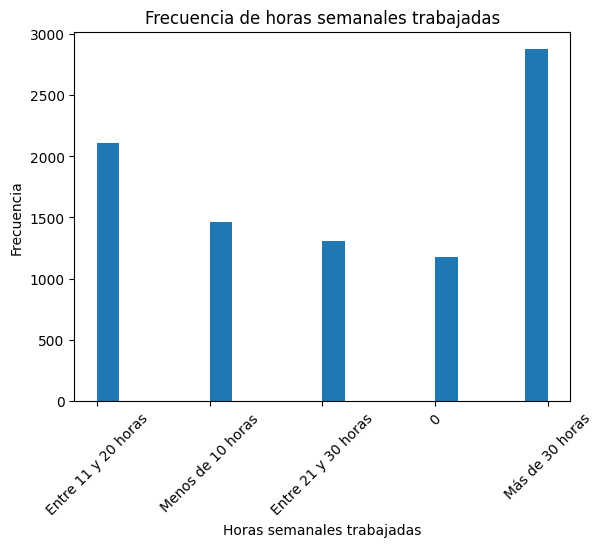

In [20]:
# Diagrama de frecuencia de ESTU_HORASSEMANATRABAJA
plt.hist(clean_data_df['ESTU_HORASSEMANATRABAJA'], bins=20)
plt.xlabel('Horas semanales trabajadas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de horas semanales trabajadas')
# girar los textos en el eje x
plt.xticks(rotation=45)
plt.show()

In [21]:
# Modificar ESTU_HORASSEMANATRABAJA
# 0 = 0
# Menos de 10 horas = 10
# Entre 11 y 20 horas = 20
# Entre 21 y 30 horas = 30
# Más de 30 horas = 40
clean_data_df['ESTU_HORASSEMANATRABAJA'] = clean_data_df['ESTU_HORASSEMANATRABAJA'].replace('0', 0)
clean_data_df['ESTU_HORASSEMANATRABAJA'] = clean_data_df['ESTU_HORASSEMANATRABAJA'].replace('Menos de 10 horas', '10')
clean_data_df['ESTU_HORASSEMANATRABAJA'] = clean_data_df['ESTU_HORASSEMANATRABAJA'].replace('Entre 11 y 20 horas', '20')
clean_data_df['ESTU_HORASSEMANATRABAJA'] = clean_data_df['ESTU_HORASSEMANATRABAJA'].replace('Entre 21 y 30 horas', '30')
clean_data_df['ESTU_HORASSEMANATRABAJA'] = clean_data_df['ESTU_HORASSEMANATRABAJA'].replace('Más de 30 horas', '40')
clean_data_df['ESTU_HORASSEMANATRABAJA'] = clean_data_df['ESTU_HORASSEMANATRABAJA'].astype(int)


In [22]:
for column in clean_data_df.columns:
    print(f"Columna: {column}")
    print(clean_data_df[column].unique())
    print("")

Columna: PERIODO
[2018 2019 2020 2021 2022]

Columna: ESTU_DEPTO_RESIDE
['BOGOTÁ' 'CUNDINAMARCA' 'CALDAS' 'NARIÑO' 'VALLE' 'META' 'BOYACA'
 'QUINDIO' 'TOLIMA' 'SANTANDER' 'CAUCA' 'HUILA' 'NORTE SANTANDER'
 'SAN ANDRES' 'CAQUETA' 'CORDOBA' 'LA GUAJIRA' 'ANTIOQUIA' 'AMAZONAS'
 'CASANARE' 'GUAINIA' 'RISARALDA']

Columna: ESTU_PRGM_ACADEMICO
['INGENIERIA FORESTAL' 'INGENIERIA CATASTRAL Y GEODESIA'
 'INGENIERIA ELECTRICA' 'INGENIERIA INDUSTRIAL' 'INGENIERIA DE SISTEMAS'
 'INGENIERIA ELECTRONICA' 'ARTES MUSICALES'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN CIENCIAS SOCIALES'
 'INGENIERIA EN CONTROL'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN INGLES'
 'INGENIERIA TOPOGRAFICA' 'INGENIERIA AMBIENTAL'
 'LICENCIATURA EN BIOLOGIA'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES Y LENGUA CASTELLANA'
 'INGENIERÍA SANITARIA' 'INGENIERIA DE PRODUCCION'
 'LICENCIATURA EN PEDAGOGIA INFANTIL' 'ADMINISTRACION DEPORTIVA'
 'ADMINISTRACION AMBIENTAL' 'ARTES PLASTICAS Y VISUALES'
 

In [23]:
# Generar un archivo de "data_tranformed.csv"
clean_data_df.to_csv("raw_data/data_transformed.csv", index=False)